# Clustering - Conjunto de Datos Iris

Aplicando técnicas de clustering se buscó segmentar las especies de la flor Iris utilizando el conjunto de datos clásico de Machine Learning. Se explorarán los datos visualmente y se implementará el algoritmo K-Means para agrupar las muestras según la forma del sépalo y el pétalo. Además, se empleará el método del "codo" y la librería kneed para determinar el número óptimo de clusters. Finalmente, se compararán los resultados obtenidos con los datos reales para evaluar la efectividad del modelo.

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
%matplotlib inline

def borrarNulosDuplicados(df, cant_object, cant_obs, flag_object):
    if cant_obs == 0:  
        print("No hay observaciones en el DataFrame.")
        return df
    
    prop = cant_object / cant_obs
    type_data = "nulos" if flag_object else "duplicados"

    if prop == 0:
        print(f"El porcentaje de datos {type_data} es del 0%. No es necesario eliminarlos.")
    elif prop > 0.05:  # Regla del 5%
        print(f"El porcentaje de datos {type_data} es del {prop*100:.2f}%. Se debe hacer otro método de eliminación.")
    else:
        print(f"El porcentaje de datos {type_data} es del {prop*100:.2f}%. Se pueden eliminar los datos.")

        if flag_object:
            df = df.dropna()  # Reasignar el DataFrame corregido
        else:
            df = df.drop_duplicates()

    return df

In [59]:
iris_df_s1 = pd.read_csv("iris.csv")

columns = iris_df_s1.columns
cant_obs = iris_df_s1.shape[0]
cant_var = iris_df_s1.shape[1]
cant_nulos = iris_df_s1.isnull().sum().sum()
cant_dupli = iris_df_s1.duplicated().sum()

print("- Vista Previa DF:\n",iris_df_s1.head(10))
print(f"- Tamaño de DF: \n\t• {cant_obs} filas \n\t• {cant_var} columnas")
print(f"- Existen: \n\t• {cant_nulos} valores nulos \n\t• {cant_dupli} valores duplicados")
print("- Columnas:")
for col in columns:
  print(f"\t• {col}")


iris_df_s1 = borrarNulosDuplicados(df=iris_df_s1, cant_object=cant_nulos, cant_obs=cant_obs, flag_object=True)
iris_df_s1 = borrarNulosDuplicados(df=iris_df_s1, cant_object=cant_dupli, cant_obs=cant_obs, flag_object=False)

iris_df_s2 = iris_df_s1.copy()
iris_df_s3 = iris_df_s1.copy()

- Vista Previa DF:
    sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
5           5.4          3.9           1.7          0.4
6           4.6          3.4           1.4          0.3
7           5.0          3.4           1.5          0.2
8           4.4          2.9           1.4          0.2
9           4.9          3.1           1.5          0.1
- Tamaño de DF: 
	• 150 filas 
	• 4 columnas
- Existen: 
	• 0 valores nulos 
	• 3 valores duplicados
- Columnas:
	• sepal_length
	• sepal_width
	• petal_length
	• petal_width
El porcentaje de datos nulos es del 0%. No es necesario eliminarlos.
El porcentaje de datos duplicados es del 2.00%. Se pueden eliminar los datos.


## Sección 1

1. **Visualicen los datos para ver si pueden detectar algunos grupos. Ayuda: utilicen la forma del sépalo:**

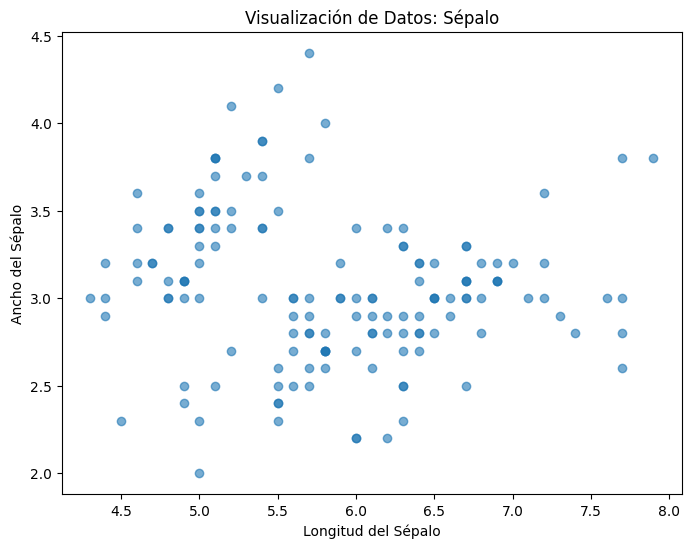

In [8]:
# Gráfico de dispersión de la forma del sépalo

plt.figure(figsize=(8,6))
plt.scatter(iris_df_s1["sepal_length"], iris_df_s1["sepal_width"], alpha=0.6)

# Etiquetas
plt.xlabel("Longitud del Sépalo")
plt.ylabel("Ancho del Sépalo")
plt.title("Visualización de Datos: Sépalo")

# Mostrar el gráfico
plt.show()

**Respuesta:**

A simple vista, podemos notar que hay ciertos grupos de puntos, lo que sugiere que los datos pueden agruparse en clusters. 

Sin embargo, los puntos aún no tienen etiquetas, por lo que necesitamos aplicar métodos de clustering para confirmar las agrupaciones. 

2. **Creen 2 "clusters" utilizando K_Means Clustering y grafiquen los resultados.**

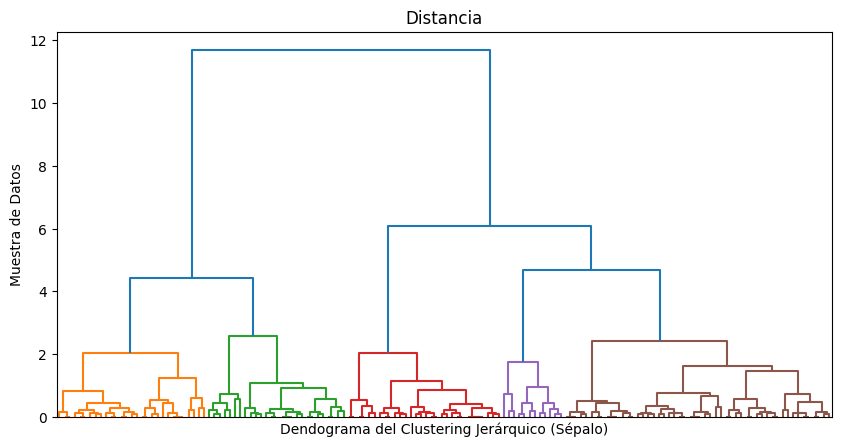

In [10]:
linked = sch.linkage(iris_df_s1[["sepal_length", "sepal_width"]], method = "ward")
plt.figure(figsize=(10,5))
sch.dendrogram(linked, no_labels = True, color_threshold = 4)

# Etiquetas
plt.xlabel("Dendograma del Clustering Jerárquico (Sépalo)")
plt.ylabel("Muestra de Datos")
plt.title("Distancia")

# Mostrar dendograma
plt.show()


**Respuesta:**

El dendrograma nos permite visualizar cómo se agrupan los datos jerárquicamente.

Cada bifurcación representa la unión de dos clusters.

El número de cortes óptimo en el dendrograma sugiere cuántos clusters podrían ser adecuados para los datos.

En este caso, parece haber al menos 3 o 4 posibles agrupaciones (separadas por diferentes colores).


3. **Estandaricen los datos e intenten el paso 2, de nuevo. ¿Qué diferencias hay, si es que lo hay?**

4. **Utilicen el método del "codo" para determinar cuantos "clusters" es el ideal. (prueben un rango de 1 a 10)**

5. **Basado en la gráfica del "codo" realicen varias gráficas con el número de clusters (unos 3 o 4 diferentes) que Uds creen mejor se ajusten a los datos.**

6. **Comparen sus soluciones con los datos reales, archivo: iris-con-respuestas.csv**

**Obviamente solo hay tres especies, porque ese es el archivo de datos reales!**

**¿Funcionó el clustering con la forma del sépalo?****

## Sección 2

Repitan el proceso pero ahora utilizando la forma del pétalo. Respondan a las mismas preguntas.

In [2]:
iris_df_s2.head(n=10)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


1. **Visualicen los datos para ver si pueden detectar algunos grupos. Ayuda: utilicen la forma del sépalo:**


**Respuesta:** hola mundo.

2. **Creen 2 "clusters" utilizando K_Means Clustering y grafiquen los resultados.**

**Respuesta:** hola mundo.

3. **Estandaricen los datos e intenten el paso 2, de nuevo. ¿Qué diferencias hay, si es que lo hay?**

**Respuesta:** hola mundo.

4. **Utilicen el método del "codo" para determinar cuantos "clusters" es el ideal. (prueben un rango de 1 a 10)**

**Respuesta:** hola mundo.

5. **Basado en la gráfica del "codo" realicen varias gráficas con el número de clusters (unos 3 o 4 diferentes) que Uds creen mejor se ajusten a los datos.**

**Respuesta:** hola mundo.

6. **Comparen sus soluciones con los datos reales, archivo: iris-con-respuestas.csv**

**Respuesta:** hola mundo.

**Obviamente solo hay tres especies, porque ese es el archivo de datos reales!**

**¿Funcionó el clustering con la forma del sépalo?****

**Respuesta:** hola mundo.